Генерирање на 50000 Noise+BNS samples

In [1]:
! pip install -q 'lalsuite==7.11' 'PyCBC==2.0.5'

In [2]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd
import numpy as np
import os
import zipfile
from google.colab import files
import pandas as pd
import random

In [3]:
snr1 = [4,5,6,7,8,9,10,11]
snr2 = [12,13,14,15,16,17,18,19]
snr3 = [20,21,22,23,24,25,26,27]
snr_values = np.arange(4, 31)
flow_array = [10,15,20,25,30]

In [4]:
output_dir = 'noise_bns_samples'
os.makedirs(output_dir, exist_ok=True)

In [5]:
group1 = np.arange(1, 2001)
group2 = np.arange(2001, 4001)
group3 = np.arange(4001, 6001)
files_total = np.arange(1, 6001)
group4 = np.arange(1,2001)

In [6]:
noise_bns_samples = []

In [7]:
for i in group1:
  bns_waveform_file = f'/content/BNS/BNS/strain{i}.npy'
  bns_waveform = np.load(bns_waveform_file)
  for snr in snr1:
    flow = random.choice(flow_array)
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    desired_std = np.max(np.abs(bns_waveform)) / snr

    delta_t = 1.0 / 2048
    tsamples = len(bns_waveform)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=np.random.randint(0, 2**32))
    noise *= desired_std / np.std(noise)

    mixed_signal = bns_waveform + noise

    noise_bns_samples.append(mixed_signal)

In [8]:
for i in group2:
  bns_waveform_file = f'/content/BNS/BNS/strain{i}.npy'
  bns_waveform = np.load(bns_waveform_file)
  for snr in snr2:
    flow = random.choice(flow_array)
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    desired_std = np.max(np.abs(bns_waveform)) / snr

    delta_t = 1.0 / 2048
    tsamples = len(bns_waveform)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=np.random.randint(0, 2**32))
    noise *= desired_std / np.std(noise)

    mixed_signal = bns_waveform + noise

    noise_bns_samples.append(mixed_signal)

In [9]:
for i in group3:
  bns_waveform_file = f'/content/BNS/BNS/strain{i}.npy'
  bns_waveform = np.load(bns_waveform_file)
  for snr in snr3:
    flow = random.choice(flow_array)
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    desired_std = np.max(np.abs(bns_waveform)) / snr

    delta_t = 1.0 / 2048
    tsamples = len(bns_waveform)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=np.random.randint(0, 2**32))
    noise *= desired_std / np.std(noise)

    mixed_signal = bns_waveform + noise

    noise_bns_samples.append(mixed_signal)

In [10]:
for i in group4:
  j = random.choice(files_total)
  bns_waveform_file = f'/content/BNS/BNS/strain{j}.npy'
  bns_waveform = np.load(bns_waveform_file)
  snr = random.choice(snr_values)
  flow = random.choice(flow_array)
  delta_f = 1.0 / 16
  flen = int(2048 / delta_f) + 1
  psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

  desired_std = np.max(np.abs(bns_waveform)) / snr

  delta_t = 1.0 / 2048
  tsamples = len(bns_waveform)
  noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=np.random.randint(0, 2**32))
  noise *= desired_std / np.std(noise)

  mixed_signal = bns_waveform + noise

  noise_bns_samples.append(mixed_signal)

In [11]:
print(len(noise_bns_samples))

50000


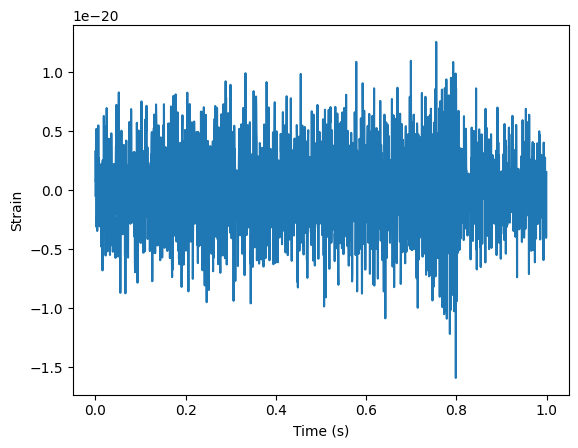

In [12]:
pp.plot(noise_bns_samples[0].sample_times, noise_bns_samples[0])
pp.ylabel('Strain')
pp.xlabel('Time (s)')
pp.show()

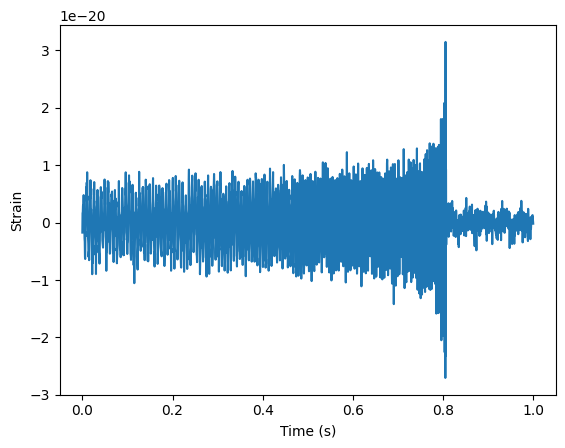

In [13]:
pp.plot(noise_bns_samples[32008].sample_times, noise_bns_samples[32008])
pp.ylabel('Strain')
pp.xlabel('Time (s)')
pp.show()

In [14]:
output_dir = 'noise_bns_samples'
os.makedirs(output_dir, exist_ok=True)

file_paths = []
labels = []

for i, noise_bns_sample in enumerate(noise_bns_samples):

    folder_name = f'Noise_BNS{i + 1}'
    folder_path = os.path.join(output_dir, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    # zachuvuvanje na sekoj primerok kako npy file
    file_path = os.path.join(folder_path, f'noise_bns{i + 1}.npy')
    np.save(file_path, noise_bns_sample)

    file_paths.append(file_path)
    labels.append('Noise+BNS')

label_array = np.column_stack((file_paths, labels))

# zachuvuvanje na labelite za sekoj primerok kako npy file
label_file_path = os.path.join(output_dir, 'labels_noise_bns.npy')
np.save(label_file_path, label_array)

In [15]:
zip_file_path = 'noise_bns_samples.zip'
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file_path in file_paths:
        zipf.write(file_path)


files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>